## Exploring Jazz Musician Collaborations using NetworkX

Here I will be analysing a graph representing Collaborations among Jazz Musicians. Along the way we will also learn & explore some interesting concepts from Graph Theory using NetworkX package.

About Datset: Each node is a Jazz musician and an edge denotes that two musicians have played together in a band. You can find more information form data source: http://konect.uni-koblenz.de/networks/arenas-jazz

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Reading dataset
interaction_graph = nx.read_edgelist("out.arenas-jazz", create_using = nx.Graph(), nodetype = int)

In [4]:
#Interaction Graph Details
print(nx.info(interaction_graph))

Name: 
Type: Graph
Number of nodes: 198
Number of edges: 2742
Average degree:  27.6970


** Graph contains data of 198 Jazz musicians & 2742 collaborations among them.**

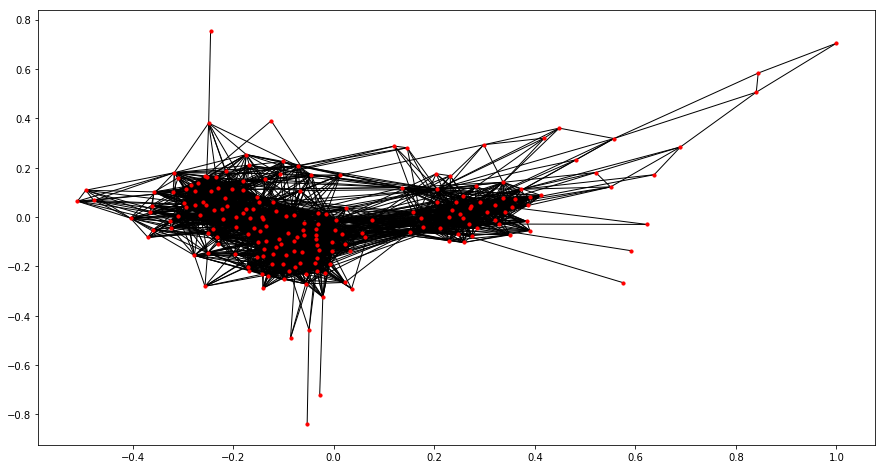

In [5]:
#Lets plot this graph
plt.figure(figsize=(15,8))
spring_pos = nx.spring_layout(interaction_graph)
nx.draw_networkx(interaction_graph, pos = spring_pos, with_labels = False, node_size = 10)

### Finding Maximum Clique

** Complete Graph:** _Complete Graph is a graph in which each pair of graph vertices is connected by an edge._

** Clique:** _A clique of a graph G is a complete subgraph of G._

** Maximum Clique:** _A maximal clique is a clique that cannot be extended by including one more adjacent vertex, meaning it is not a subset of a larger clique. A maximum clique (i.e., clique of largest size in a given graph) is therefore always maximal, but the converse does not hold._

** So a maximum clique in our problem is a subset of Jazz Musicians who have all performed with each other. Lets find this clique now. **

In [6]:
from networkx.algorithms.approximation import *
maxc = clique.max_clique(interaction_graph)
print("Clique Nodes: ",maxc)
print("Clique Size: ",len(maxc))

#Our maximum clique have 27 nodes below

Clique Nodes:  {4, 133, 7, 137, 12, 13, 14, 15, 18, 19, 20, 21, 149, 23, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 101, 121}
Clique Size:  27


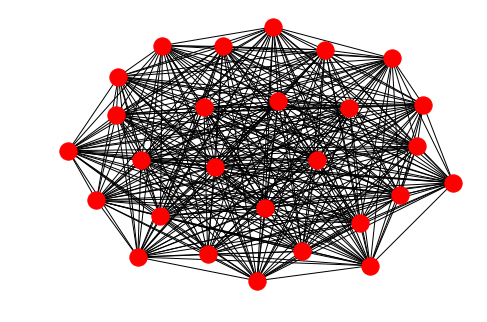

In [7]:
#Lets visualize this subgraph now 

nodes = [n for n in maxc]
k = interaction_graph.subgraph(nodes)
nx.draw(k)

### Finding Independent Set

**Independent Set:** _An independent vertex set of a graph G is a subset of the vertices such that no two vertices in the subset represent an edge of G. _

**So an Independent Set will represent set of Jazz Musicians who have not performed with each other. Lets find this set.**

In [8]:
max_is = independent_set.maximum_independent_set(interaction_graph)
print("Maximum Indepenset Set: ",max_is)
print("MIS Size: ",len(max_is))

#Our Maximum Independent Set have a set of 35 musicians who have not performed with any one of each other.

Maximum Indepenset Set:  {128, 131, 5, 141, 144, 145, 16, 151, 25, 157, 158, 29, 162, 41, 46, 177, 50, 49, 180, 56, 185, 57, 187, 190, 191, 192, 193, 195, 197, 198, 77, 96, 99, 108, 120}
MIS Size:  35


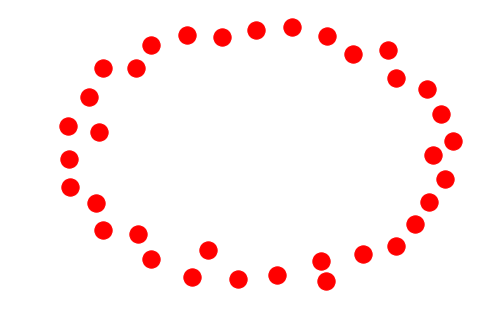

In [9]:
#Plotting Maximum Independent Set
nodes = [n for n in max_is]
k = interaction_graph.subgraph(nodes)
nx.draw(k)

#Here each node(Jazz Musican) is isolated as there is no edge(Collaboration) among them

### Finding Maximal Matching

***Minimal Maximal Matching: *** _Given a graph G = (V,E), a matching M in G is a set of pairwise non-adjacent
edges; that is, no two edges share a common vertex._ 

**So this set will show distinct collaboration pairs among Jazz Musicians.**

In [10]:
mmm = matching.min_maximal_matching(interaction_graph)
print("Minimal Maximal Matching Edges: ",mmm)
print("Total Edges: ",len(mmm))

Minimal Maximal Matching Edges:  {(110, 75), (140, 85), (170, 171), (106, 80), (166, 129), (143, 36), (64, 41), (51, 39), (149, 74), (18, 9), (118, 95), (154, 33), (29, 30), (88, 70), (189, 59), (79, 182), (173, 174), (121, 56), (172, 153), (156, 73), (21, 112), (168, 135), (176, 175), (180, 61), (86, 114), (193, 194), (65, 66), (13, 3), (104, 54), (120, 55), (152, 151), (1, 10), (157, 48), (117, 46), (134, 132), (14, 6), (122, 31), (137, 126), (15, 7), (108, 81), (147, 148), (150, 128), (22, 119), (72, 45), (115, 198), (19, 100), (133, 82), (161, 37), (12, 4), (177, 155), (187, 188), (50, 52), (35, 34), (163, 162), (42, 38), (78, 77), (107, 89), (167, 131), (169, 136), (138, 84), (20, 101), (17, 5), (116, 90), (98, 94), (181, 71), (145, 146), (105, 26), (16, 8), (139, 32), (68, 43), (125, 27), (24, 103), (11, 2), (164, 87), (44, 63), (165, 97), (23, 102), (160, 93), (123, 67), (183, 53), (92, 91), (111, 83), (124, 28), (60, 40), (178, 179), (130, 47), (109, 62), (58, 57), (141, 142), 

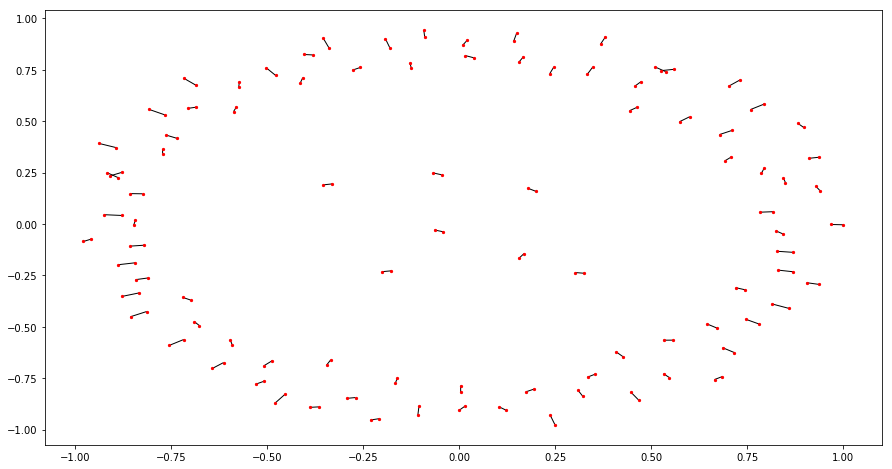

In [11]:
#Plotting Minimal Maximal Matching Graph
plt.figure(figsize=(15,8))
G=nx.Graph()
G.add_edges_from(list(mmm))

spring_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 5)

### Finding Vertex Cover

**Vertex Cover:** _A Vertex Cover is a subset of nodes such that each edge in the graph
is incident to at least one node in the subset._

**So vetex cover will show us all jazz musicians who together were part of all collaborations**

In [12]:
vc = vertex_cover.min_weighted_vertex_cover(interaction_graph)
print("Vertices in Vertex Cover: ",vc)
print("Total Vertices: ",len(vc))

Vertices in Vertex Cover:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 193, 194, 198}
Total Vertices:  184


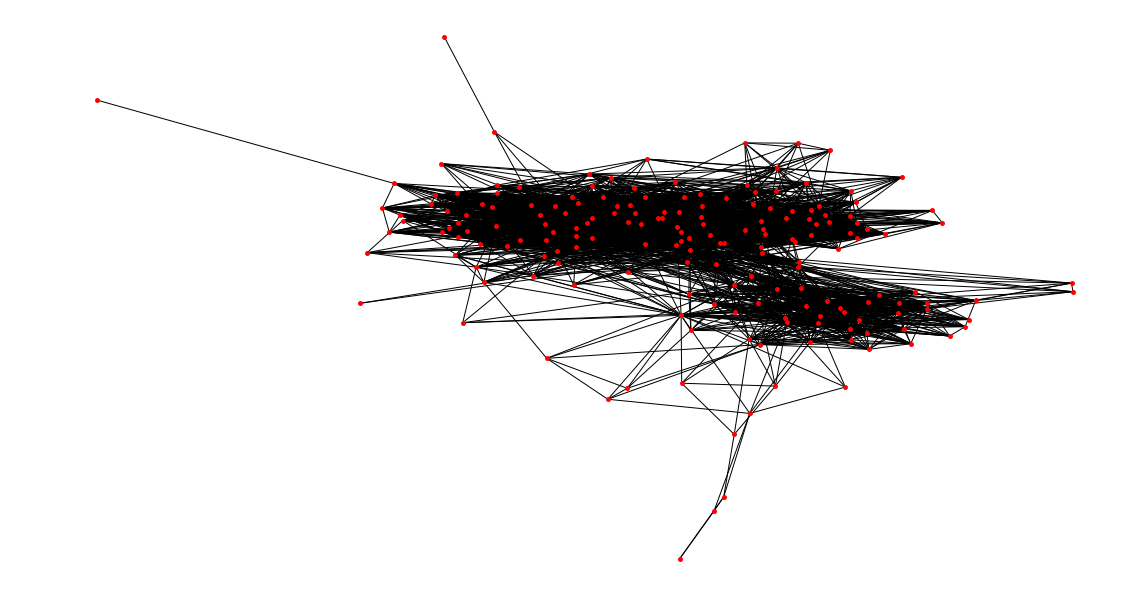

In [13]:
plt.figure(figsize=(15,8))
nodes = [n for n in vc]
k = interaction_graph.subgraph(nodes)
nx.draw(k, with_labels = False, node_size = 15)

### Finding Vertex Degree

**Vertex Degree:** _The degree of a graph vertex V of a graph G = (V,E) is the number of graph edges(E) which touch V._

**So Vertex Degree will represent number of interations or collaborations each Jazz Musician had.**

In [14]:
interaction_graph.degree()

DegreeView({1: 23, 10: 42, 11: 40, 12: 46, 13: 60, 14: 49, 15: 49, 16: 23, 17: 20, 18: 60, 19: 56, 2: 21, 20: 75, 21: 43, 22: 10, 23: 74, 24: 45, 3: 29, 4: 43, 5: 12, 6: 23, 7: 96, 8: 20, 9: 26, 120: 17, 121: 43, 122: 41, 123: 39, 124: 31, 125: 52, 67: 100, 130: 19, 145: 8, 146: 9, 147: 8, 148: 24, 149: 48, 150: 38, 157: 11, 159: 29, 160: 25, 101: 55, 112: 48, 128: 41, 133: 51, 137: 46, 152: 30, 164: 39, 165: 40, 166: 34, 167: 34, 168: 37, 169: 32, 170: 31, 171: 32, 172: 33, 173: 34, 174: 33, 177: 14, 178: 14, 179: 18, 153: 27, 155: 39, 100: 44, 102: 31, 103: 29, 104: 23, 105: 35, 106: 23, 107: 27, 108: 23, 109: 59, 110: 31, 111: 53, 116: 27, 117: 55, 118: 28, 119: 46, 127: 13, 138: 21, 139: 37, 140: 20, 154: 36, 191: 6, 26: 25, 27: 46, 28: 39, 48: 24, 54: 42, 55: 37, 74: 56, 75: 45, 76: 36, 80: 57, 81: 27, 83: 26, 84: 42, 85: 25, 86: 32, 87: 33, 89: 53, 90: 62, 92: 9, 93: 59, 95: 27, 96: 26, 97: 41, 98: 28, 91: 30, 94: 24, 134: 16, 192: 10, 114: 39, 158: 19, 88: 29, 187: 12, 188: 8, 1

In [15]:
#Lets Find the misician who have maximum number of collaborations using cocept of vertex degree
max_degree=0
vertex=0
for i in range(1,198):
    if(int(interaction_graph.degree(i))>max_degree):
        max_degree = int(interaction_graph.degree(i))
        vertex = i
        
print("Vertex",vertex,"have degree",max_degree)

#So Musician number 67 have collaborated with 100 other Jazz musicians

Vertex 67 have degree 100


### Finding Pendent Vertices

**Pendent Vertex:** _A vertex of a graph is said to be pendant if its neighborhood contains exactly one vertex._

**So a Jazz Musician who have only collaborated once is a Pendent Vertex in our interaction graph. Lets find these musicians.**

In [16]:
pendent_vertices = [x for x in interaction_graph.nodes() if interaction_graph.degree(x)==1]
pendent_vertices

#These 5 musicians have only collabrated once.

[49, 197, 198, 162, 195]

_Thanks for reading, I will be share more on graph analysis and algorithms with networkx soon._